
# Mask R-CNN Shiny
This demo uses Mask-RCNN to accomplish the image processing. Input an original image (suppose this image include a person or other objects), this program will recognize :
-the main character
-all filtered characters by class
-all filtered characters by detected masks
-main characters in every single class(if any)
and save the as objects as RGB image while other background information will be changed to grayscale/blur/monobackground.

# Copyright (c) HU Shiyu @huuuuusy hushiyu1995@qq.com
# Modified by Farhan Hai Khan @khanfarhan10 njrfarhandasilva10@gmail.com

------------------------------------------------------------

Usage: (see Jupyter notebooks for examples)


# Introduction

This demo uses Mask-RCNN to accomplish the image processing. Input an original image (suppose this image include a person or other objects), this program will recognize :<br>
-the main character<br>
-all filtered characters by class<br>
-all filtered characters by detected masks<br>
-main  characters in every single class(if any)<br>
and save the as  objects as RGB image while other background information will be changed to grayscale/blur/monobackground. 



# Import Modules

In [44]:
#import Modules
import cv2
from collections import OrderedDict
from operator import itemgetter
from skimage.transform import resize
import numpy as np
import operator
import os
import sys
import random
import copy
import colorsys
dir="C:\Windows\System32\Mask_RCNN"
os.chdir(dir)
sys.path.append(dir)
import sys
from samples import coco
from mrcnn import utils
from mrcnn import model as modellib
from mrcnn import visualize

# Prepare Model File and Configuration Information

Now load the pre-trained model data (Mask-RCNN trained by COCO dataset).

In [2]:
# Load the pre-trained model data
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
#"C:\Windows\System32\Mask_RCNN"
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
if not os.path.exists(COCO_MODEL_PATH):
    print("Weights not found!")
    raise FileNotFoundError
    utils.download_trained_weights(COCO_MODEL_PATH)

C:\Windows\System32\Mask_RCNN


The original configuration information is saved in config.py file. It can be changed if necessary. 

It's better to use the default value, but you can also change the GPU information to suit the personal GPU well.

In [3]:
# Change the config infermation
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    
    # Number of images to train with on each GPU. A 12GB GPU can typically
    # handle 2 images of 1024x1024px.
    # Adjust based on your GPU memory and image sizes. Use the highest
    # number that your GPU can handle for best performance.
    IMAGES_PER_GPU = 1
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

    
config = InferenceConfig()

# Load the pretrained model weights

In [4]:
# COCO dataset object names
model = modellib.MaskRCNN(
    mode="inference", model_dir=MODEL_DIR, config=config
)

#load the training weights
model.load_weights(COCO_MODEL_PATH, by_name=True)
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
    'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
    'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
    'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
    'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush']

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# Define The Image Process Functions

Now define two image process functions. 

apply_mask is used to change the background information to grayscale.

display_instances is used to show the object detection result in original image.

In [5]:
os.chdir('C:\\Windows\\System32\\Mask_RCNN')

In [6]:
d = {2:3, 1:89, 4:5, 3:0}
od = dict(OrderedDict(sorted(d.items())))
print(od)

{1: 89, 2: 3, 3: 0, 4: 5}


In [7]:
sys.path

['C:\\Users\\farha\\Desktop\\ColorSplash',
 'C:\\ProgramData\\Anaconda3\\python37.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\farha\\.ipython',
 'C:\\Windows\\System32\\Mask_RCNN',
 'C:\\Windows',
 'C:\\Windows\\System32']

In [8]:
#utility functions to be used in the code

#https://www.codespeedy.com/convert-rgb-to-hex-color-code-in-python/
#RGB to Hex
#it works!!!
def rgb_to_hex(rgb):
    r,g,b=rgb
    return '#%02x%02x%02x' % (r,g,b)
#print(rgb_to_hex((0, 34, 255)))


#Hex to RGB

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i+lv//3], 16) for i in range(0, lv, lv//3))
#print(hex_to_rgb("#0022ff"))

#https://www.codespeedy.com/create-random-hex-color-code-in-python/


#has some type of biasing that shows only green-yellow colours
def generate_random_hex():
    random_number = random.randint(0,16777215)
    hex_number = str(hex(random_number))
    hex_number ='#'+ hex_number[2:]
    print('Randomly chosen Hex Color Code is :',hex_number)
    return hex_number
#print(generate_random_hex())

#https://gist.github.com/navenduagarwal/95269ee19462e07edb2b4704116d0c5d

def create_blank(width, height, rgb_color=(0, 0, 0)):
    """Create new image(numpy array) filled with certain color in RGB"""
    # Create black blank image
    image = np.zeros((height, width, 3), np.uint8)

    # Since OpenCV uses BGR, convert the color first
    color = tuple(reversed(rgb_color))
    # Fill image with color
    image[:] = color

    return image

#generates random colors in semi rgb format
"""
copied from visualize.py mask rcnn
Mask R-CNN
Display and Visualization Functions.

Copyright (c) 2017 Matterport, Inc.
Licensed under the MIT License (see LICENSE for details)
Written by Waleed Abdulla
"""

def random_colors_single(N=1, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors[0]

def sort_dict_by_val(InputDict):
    return dict( sorted(InputDict.items(), key=itemgetter(1),reverse=False))

def sort_dict_by_key(InputDict):
    return dict(OrderedDict(sorted(InputDict.items())))


def merge_list_to_dict(test_keys,test_values):
    # using dictionary comprehension 
    # to convert lists to dictionary 
    merged_dict = {test_keys[i]: test_values[i] for i in range(len(test_keys))} 
    return merged_dict

def print_dict(new_dict):
    print ("Dictionary is :  ")  
    print("keys: values") 
    for i in new_dict:
        print(i, " :", new_dict[i])
        
        
# Create new blank 300x300 red image demo code
width1, height1 = 300, 300

red = (255, 0, 0)
white=(255, 255, 255)
image = create_blank(width1, height1, rgb_color=white)
cv2.imwrite('whitenew.jpg', image)

True

In [9]:
# This function is used to change the colorful background information to grayscale.
# image[:,:,0] is the Blue channel,image[:,:,1] is the Green channel, image[:,:,2] is the Red channel
# mask == 0 means that this pixel is not belong to the object.
# np.where function means that if the pixel belong to background, change it to gray_image.
# Since the gray_image is 2D, for each pixel in background, we should set 3 channels to the same value to keep the grayscale.
#where there is no mask just make that part bw

# This function is used to change the colorful background information to blurred image.
# image[:,:,0] is the Blue channel,image[:,:,1] is the Green channel, image[:,:,2] is the Red channel
# mask == 0 means that this pixel is not belong to the object.Rather, it belongs to the background
# np.where function means that if the pixel belong to background, change it to blur_image.
# Since the blur_image is 3D, for each pixel in background, we should set 3 channels to the same value to keep the blur effect.
#where there is no mask just make that part copied from blurred images

#replace image with other image(replacement_image) where mask!=0

def apply_mask_mod(image,mask,bg_image):
    
    
    """
        This function is used to change the colorful background information to blurred image.
        image[:,:,0] is the Blue channel,image[:,:,1] is the Green channel, image[:,:,2] is the Red channel
        mask == 0 means that this pixel is not belong to the object.Rather, it belongs to the background
        np.where function means that if the pixel belong to background, change it to blur_image.
        Since the blur_image is 3D/2D, for each pixel in background, we should set 3 channels to the 
        same value to keep the blur effect.
        where there is no mask just make that part copied from blurred images

        replace image with other image(replacement_image or bg_image) where mask==0
        resets non detected parts of image with bg_image
    
    """
    
    
    #if background is not initialised , by default , consider black and white bg effect
    
    #if len(bg_image.shape)==1:
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #cv2.imwrite('gray_image.jpg', gray_image)
    #bg_image=gray_image

    length=len(bg_image.shape)
    
    if length==3:
        
        #copy code for apply_mask_3D(image, mask):
        image[:, :, 0] = np.where(
            mask == 0,
            bg_image[:, :, 0],
            image[:, :, 0]
        )
        image[:, :, 1] = np.where(
            mask == 0,
            bg_image[:, :, 1],
            image[:, :, 1]
        )
        image[:, :, 2] = np.where(
            mask == 0,
            bg_image[:, :, 2],
            image[:, :, 2]
        )
        return image
    else:
        #if length==2
        # copy code for apply_mask_2D(image, mask):
        image[:, :, 0] = np.where(
            mask == 0,
            bg_image[:, :],
            image[:, :, 0]
        )
        image[:, :, 1] = np.where(
            mask == 0,
            bg_image[:, :],
            image[:, :, 1]
        )
        image[:, :, 2] = np.where(
            mask == 0,
            bg_image[:, :],
            image[:, :, 2]
        )
    return image

In [10]:
#takes n maximums from each multiple category

#picture contains 2 zebras , 2 giraffes so num=["zebra":1,"giraffe":1] would calculate the biggest area zebra and giraffe
#and rest would be processed(b/w or blur/etc)

#picture contains 3 persons , 2 umbrellas so num=["person":2 ,"umbrellas":1] would calculate the biggest area person(2) 
#and umbrellas(1) and rest would be processed(b/w or blur/etc)

#or better if user gives objects to keep it would be better sorted abc user wants ca and not b

def display_instances_custom_mod(image, boxes, masks, ids, names, scores,mode="multi",classes_to_show=class_names,
                                 background="blur",show=[],area="all",background_image=[],blur_power=(30,30),num={},
                                 hex_code=None,bright=True):
    
    """ Creates the background image and superscribes the masked image over it.
    
        image: Numpy array of complete image to be masked 
        boxes: Regions of Interest (RoI) or bounding boxes gives boxed rectangular coordinates (x1,y1,x2,y2)
        masks: Boolean numpy array of object masks detected
        ids: Class IDs from the COCO Dataset
        names: Class names from the COCO Dataset
        scores: Class scores from the object detection results for each mask
        
        Optional Arguments:
        
        mode:   multi  : this mode captures multiple objects (default)
                single : this mode calculates the largest objects of a type
        classes_to_show :   filters out the classes you want to display
                            by default all classes are displayed
        background : blur: applies blur to the background with a given blur_power (default)
                     white: applies white background 
                     black: applies black background
                     mono: applies solid fill background with hex color choice given to user
                     greyscale: applies greyscale background 
                     another_image : applies another image to background provided in background_image
        show :  boolean list that would specify the masked objects to be processed
                by default shows all
        area :  all: would show all detected objects for a given category(default)
                max :would show the object(s) for each group occupying maximum area only
        background_image:   Numpy array of the background image to be used postprocessing
                            only works if background is set to another_image
        blur_power : The power of the blur provided a.k.a. the blurring kernel size.
        num :   The dictionary that processes the output with number of maximum areas provided
        hex_code : The hexadecimal code of the background to be used
        bright : Show only bright coloured backgrounds
    """
    
    
    orig_img = copy.deepcopy(image)
    #image = cv2.imread('C:/Windows/System32/Mask_RCNN/My_images/joe-neric-AkEMVbdEmUQ-unsplash.jpg')
    #num dictionary overrides all
    #if num is absent , list show prevails
    
    
    #else use mode and area    
    #mode area
    #filtered by classes_to_show
    #single max     biggest object returned
    #single all     identify all objects from a single category mentioned in classes_to_show[0] (1st entry)
    #multi max      takes max area object from each category detected and displays output
    #multi all      shows all detected objects 
    
    
    #mask preprocessing first
    
    
    
    
    #by default will display all the classes present
    #else it acts as a filter for classes we want to show only
    # max_area will save the largest object for all the detection results
    max_area = 0
    
    # n_instances saves the amount of all objects
    n_instances = boxes.shape[0]

    if not n_instances:
        print('NO INSTANCES TO DISPLAY')
    else:
        assert boxes.shape[0] == masks.shape[-1] == ids.shape[0]
    p = 0.1
    #empty=np.random.choice(a=[False, True], size=masks.shape, p=[p, 1-p])
    a,b,c=masks.shape
    empty=np.full((a,b), False, dtype=bool)
    sum_var=np.full((a,b), False, dtype=bool)
    #print(empty.shape)
    #here empty acts as a sum.
    
    #calculates multi all case and single max case
    if (mode=="single" and area=="max") or (mode=="multi" and area=="all"):
        for i in range(n_instances):
            if not np.any(boxes[i]):
                continue

            # compute the square of each object
            y1, x1, y2, x2 = boxes[i]
            square = (y2 - y1) * (x2 - x1)

            # use label to select person object from all the 80 classes in COCO dataset
            label = names[ids[i]]
            #create empty mask and then keep on adding mask

            if label in classes_to_show:
                # save the largest object in the image as main character
                # other people will be regarded as background
                #empty=np.add(empty[:,:],masks[:, :, i])
                empty=empty[:,:]| masks[:, :, i]
                if square > max_area:
                    max_area = square
                    mask = masks[:, :, i]
                    #print(mask.shape)
                else:
                    continue
            else:
                continue
                
    if (mode=="single" and area=="max"):
        final_mask=mask
        
    if (mode=="multi" and area=="all"):
        final_mask=empty

        
    #calculates single all
    if (mode=="single" and area=="all"):
        for i in range(n_instances):
            if not np.any(boxes[i]):
                continue


            # use label to select person object from all the 80 classes in COCO dataset
            label = names[ids[i]]
            #create empty mask and then keep on adding mask

            if label==classes_to_show[0]:
                sum_var=sum_var[:,:]| masks[:, :, i]
            else:
                continue
        final_mask=sum_var
    
    
    #calculates multi max
    sum_master=np.full((a,b), False, dtype=bool)
    sum_slave=np.full((a,b), False, dtype=bool)
    if (mode=="multi" and area=="max"):
        unique_labels=[]
        for i in range(n_instances):
            if not np.any(boxes[i]):
                continue
            # use label to select person object from all the 80 classes in COCO dataset
            label = names[ids[i]]
            unique_labels.append(label)
        unique_labels=list(set(unique_labels))
        for each_label in unique_labels:
            for i in range(n_instances):
                if not np.any(boxes[i]):
                    continue

                # compute the square of each object
                y1, x1, y2, x2 = boxes[i]
                square = (y2 - y1) * (x2 - x1)

                # use label to select person object from all the 80 classes in COCO dataset
                label = names[ids[i]]
                #create empty mask and then keep on adding mask

                if label==each_label:
                    # save the largest object in the image as main character
                    # other people will be regarded as background
                    if square > max_area:
                        max_area = square
                        sum_slave = masks[:, :, i]
                        #print(mask.shape)
                    else:
                        continue
                else:
                    continue
            sum_master=sum_master[:,:]| sum_slave[:, :]
            #todo maybe error in above line
            #sum_master=sum_master[:,:]| sum_slave[:, :,0]
        final_mask=sum_master
    
    
    #if using the show case
    if (len(show)!=0):
        #calculates show case
        for i in range(n_instances):
            if not np.any(boxes[i]):
                continue
            # use label to select person object from all the 80 classes in COCO dataset
            label = names[ids[i]]
            #create empty mask and then keep on adding mask
            try:
                if (show[i]==False):
                    continue
            except:
                break
            #finally
            if label in classes_to_show:
                sum_var=sum_var[:,:]| masks[:, :, i]
            else:
                continue
        final_mask=sum_var
    
    
    
    #using the num case
    #num is going to be a dictionary
    #picture contains 2 zebras , 2 giraffes so num=["zebra":1,"giraffe":1] would calculate the biggest area zebra and giraffe
    #and rest would be processed(b/w or blur/etc)

    #picture contains 3 persons , 2 umbrellas so num=["person":2 ,"umbrellas":1] would calculate the biggest area person(2) 
    #and umbrellas(1) and rest would be processed(b/w or blur/etc)
    sum_master=np.full((a,b), False, dtype=bool)
    sum_num=np.full((a,b), False, dtype=bool)
    
    
    if(len(num)!=0):
        length=len(num)
        key_list=num.keys()
        value_list=num.vals()
        
        sq=[0]*n_instances #keeps area of each instance calculated before hand
        for i in range(n_instances):
                if not np.any(boxes[i]):
                    continue
                y1, x1, y2, x2 = boxes[i]
                square = (y2 - y1) * (x2 - x1)
                sq[i]=square
        all_squares=merge_list_to_dict(list(range(n_instances)),sq)
        sorted_squares=sort_dict_by_val(all_squares)
        
        count_list=[] #counts the category
         #instance_number of entries for each category
        for each_label in key_list:
            temp_list=[]
            for i in range(n_instances):
                if not np.any(boxes[i]):
                    continue
                # use label to select person object from all the 80 classes in COCO dataset
                label = names[ids[i]]
                if(label==each_label):
                    temp_list.append(i)
            count_list.append(temp_list)
        #print(count_list)
        sorted_count_list=[]
        
        
        for i in range(length):
            each_list=count_list[i]
            #now we sort out each_list wrt sq area
            #then use bubble sort
            n=len(each_list)
            for j in range(n):
                for k in range(n-j-1):   
                    if sq[each_list[j]]<sq[each_list[j+1]]:
                        each_list[j],each_list[j+1]=each_list[j+1],each_list[j]
            # now that we have a descending order list
            sorted_count_list.append(each_list)
                        
        #now value play of the dictionary comes into picture
        for i in range(length):
            current_value=value_list[i]
            if current_value==0:
                #skip
                continue
            current_label=key_list[i]
            current_instances=sorted_count_list[i]
            for j in range(current_value):
                try:
                    current_instance=current_instances[j]
                    sum_num=sum_num[:,:]| masks[:, :, current_instance]
                except:
                    continue
            sum_master=sum_master[:,:]|sum_num[:,:]
        final_mask=sum_master

            
    s1,s2,s3=image.shape
    finale_mask = copy.deepcopy(final_mask)
    
    
    #display the applied mask as white on top of black image
    black_img = np.zeros([s1,s2,s3],dtype=np.uint8)
    cv2.imwrite('black_bg_img.jpg',black_img)
    white_img = np.zeros([s1,s2,s3],dtype=np.uint8)
    white_img.fill(255)
    cv2.imwrite('white_bg_img.jpg',white_img)
    mask_image= apply_mask_mod(black_img, final_mask,white_img)
    cv2.imwrite('current_applied_mask.jpg',mask_image)
    
    
    
    #background processing
    
    
    if background=="blur":
        ksize = blur_power 
        # Using cv2.blur() method  
        background_image = cv2.blur(image, ksize, cv2.BORDER_DEFAULT) 
        cv2.imwrite('blur_image.jpg',background_image)
        #os.path.join()
    elif background=="white":
        white_img = np.zeros([s1,s2,s3],dtype=np.uint8)
        white_img.fill(255) # or img[:] = 255
        background_image=white_img
        cv2.imwrite('white_image.jpg',background_image)
    elif background=="black":
        black_img = np.zeros([s1,s2,s3],dtype=np.uint8)
        background_image = black_img 
        cv2.imwrite('black_image.jpg',background_image)
    elif background=="mono":
        if (hex_code==None):
            #give random hex code
            print("hex_color parameter is empty.Using randomly generated Hex_Code!")
            #hex_code=generate_random_hex()
            r,g,b=random_colors_single(N=1, bright=bright)
            r=round(r*255)
            g=round(g*255)
            b=round(b*255)
            hex_code=rgb_to_hex((r, g, b))
        rgb_code=hex_to_rgb(hex_code)
        red,green,blue=rgb_code
        red=round(red*255)
        green=round(green*255)
        blue=round(blue*255)
        background_image = create_blank(s2, s1, rgb_color=(red,green,blue))
        cv2.imwrite('random_bright_rgb'+str(red)+'_'+str(green)+'_'+str(blue)+'.jpg', background_image)
    elif background=="greyscale":
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        background_image=gray_image
        cv2.imwrite('gray_image.jpg',background_image)  
    elif background=="another_image":
        if (len(background_image.shape)==1) :
            print("Error! background parameter is set to another_image but no numpy image provided in background_image ")
            raise ParameterMissingError
        #already pre initialised background_image
        cv2.imwrite('another_image.jpg',background_image)
    
    #saves current working background_image
    cv2.imwrite('current_background_image.jpg',background_image)
    
    #finally apply the mask
    res_image= apply_mask_mod(orig_img, finale_mask,background_image)
        
    return res_image

# Prepare Image

First, load the original image from disk and show it in window by using OpenCV.

In [11]:
# Input the original image name
original_image = 'C:/Windows/System32/Mask_RCNN/My_images/joe-neric-AkEMVbdEmUQ-unsplash.jpg'

In [12]:

# Use OpenCV to read and show the original image
image = cv2.imread(original_image)
#cv2.imshow('original_image', image)

print("Read original image successfully! The original image shape is:")
print(image.shape)
print("Press ESC to exit or press s to save and exit.")
cv2.imwrite('original_image.jpg', image)


Read original image successfully! The original image shape is:
(4992, 3328, 3)
Press ESC to exit or press s to save and exit.


True

Next, use cvtColor to accomplish image transformation from RGB image to gray image.

**Attention: the original image is an colorful image which has 3 channels(RGB), while the gray image is a grayscale, which only has 2D format.**

In [13]:
# Use cvtColor to accomplish image transformation from RGB image to gray image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow('gray_image', gray_image)

print("Change gray image successfully! The gray image shape is:")
print(gray_image.shape)
print("Press ESC to exit or press s to save and exit.")
cv2.imwrite('gray_image.jpg', gray_image)


Change gray image successfully! The gray image shape is:
(4992, 3328)
Press ESC to exit or press s to save and exit.


True

In [14]:
# Using Background Blur as GreyImg (alias)
# Python program to explain cv2.blur() method  
  
# importing cv2  
import cv2  
  
# path  
path = r'C:\Windows\System32\Mask_RCNN\original_image.jpg'
  
# Reading an image in default mode  
gray_image = cv2.imread(path)  
  
# Window name in which image is displayed  
window_name = 'Image'
  
# ksize 
ksize = (30, 30) 
#ksize = (10, 10)
  
# Using cv2.blur() method  
blur_image = cv2.blur(image, ksize, cv2.BORDER_DEFAULT) 
cv2.imwrite('blur_image.jpg', blur_image)
# Displaying the image  
#cv2.imshow(window_name, image)


True

# Process Image

Now use the functions above to accomplish the image processing and save the result.

In [15]:
results = model.detect([image], verbose=0)
r = results[0]
#print(r)
#print(r['masks'].shape)

#frame = display_instances2(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],mode="single")


Processing 1 images
image                    shape: (4992, 3328, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 4992.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


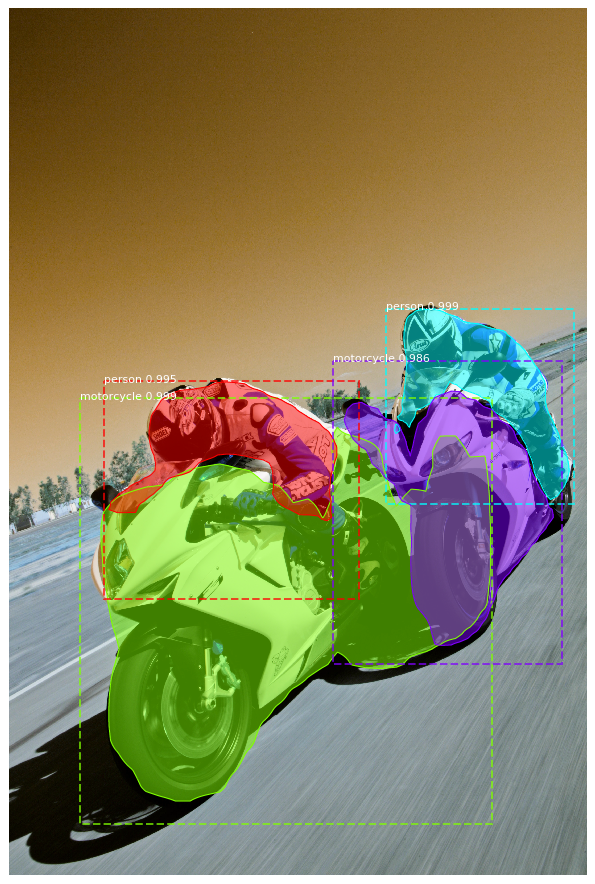

Check file at C:/Users/farha/Desktop/mrcnn_out/abcxyz.jpg


'C:/Users/farha/Desktop/mrcnn_out/abcxyz.jpg'

In [16]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
%matplotlib inline
masked_numpy_array=visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
#made changes to visualise.py

image_name = "abcxyz"

directory = "C:/Users/farha/Desktop/mrcnn_out/"
                      
                            
visualize.save_image(image=image, image_name=image_name, boxes=r['rois'], masks=r['masks'], class_ids=r['class_ids'], 
                     class_names=class_names, scores=r['scores'],save_dir=directory,scores_thresh=0.6,mode=0)

In [17]:
# Use OpenCV to read and show the original image
image = cv2.imread(original_image)
#cv2.imshow('original_image', image)

#print("Read original image successfully! The original image shape is:")
#print(image.shape)
a,b,c=image.shape
#print(a,b,c)
#print("Press ESC to exit or press s to save and exit.")
cv2.imwrite('original_image.jpg', image)
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="multi",area="all")

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image.jpg', frame)
# Wait for keys to exit or save
#cv2.destroyAllWindows()

True

In [18]:
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="multi",area="max")

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image2.jpg', frame)

True

In [19]:
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="single",area="max")

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image3.jpg', frame)

True

In [20]:
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="single",area="all",classes_to_show=["person"])

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image4.jpg', frame)

True

In [21]:
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="single",area="all",classes_to_show=["person"],background="mono",
                                     hex_code=rgb_to_hex((0, 34, 255)))

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image5.jpg', frame)

True

In [22]:
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="single",area="all",classes_to_show=["motorcycle"],background="mono",
                                     hex_code=rgb_to_hex((0, 255, 255)))

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image6.jpg', frame)

True

In [23]:
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="single",area="all",background="greyscale",classes_to_show=["person"])

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image7.jpg', frame)

True

In [24]:
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="multi",area="all",background="greyscale")

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image8.jpg', frame)

True

(1900, 3500, 3)
(1900, 3500, 3)
Processing 1 images
image                    shape: (1900, 3500, 3)       min:   18.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 3500.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


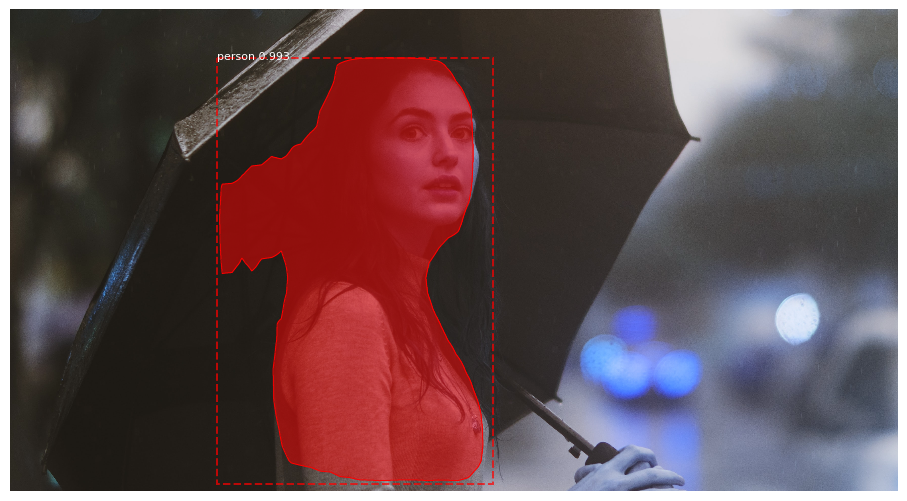

Check file at C:/Users/farha/Desktop/mrcnn_out/abcxyzgh.jpg
(1900, 3500, 3)
(1900, 3500, 3)


In [25]:
# Input the original image name
original_image='C:/Windows/System32/Mask_RCNN/My_images/jon-ly-XkuH0Ar5mhA-unsplash.jpg'
another_image = 'C:/Windows/System32/Mask_RCNN/bg/295253.jpg'
image = cv2.imread(original_image)
another_one = cv2.imread(another_image)
#1900x3500 should work fine
def cropND(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]


image =cropND(image, (1900,3500))
a,b,c=image.shape
another_one=cropND(another_one, (a,b))

print(image.shape)
print(another_one.shape)
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]

masked_numpy_array=visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
#made changes to visualise.py

image_name = "abcxyzgh"

directory = "C:/Users/farha/Desktop/mrcnn_out/"
                      
                            
visualize.save_image(image=image, image_name=image_name, boxes=r['rois'], masks=r['masks'], class_ids=r['class_ids'], 
                     class_names=class_names, scores=r['scores'],save_dir=directory,scores_thresh=0.6,mode=0)
#have to resize the image before it is sent to the function
print(image.shape)
print(another_one.shape)

In [26]:


cv2.imwrite('original_image.jpg', image)
cv2.imwrite('another_image.jpg', another_one)
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="multi",area="all",background="another_image",background_image=another_one)

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image9.jpg', frame)
# Wait for keys to exit or save
#cv2.destroyAllWindows()

True

(1999, 3024, 3)
(1999, 3024, 3)
Processing 1 images
image                    shape: (1999, 3024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 3024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


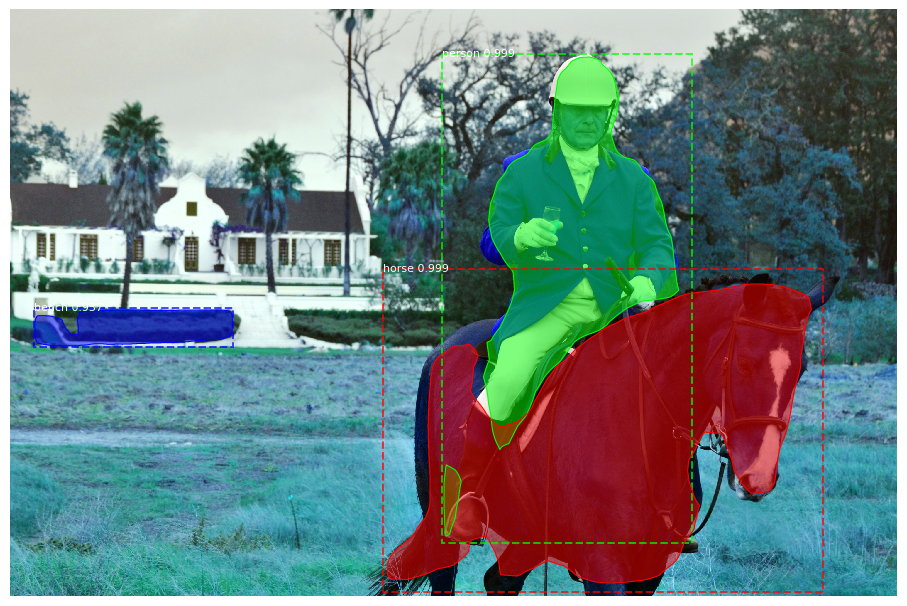

Check file at C:/Users/farha/Desktop/mrcnn_out/abcxyzghed.jpg
(1999, 3024, 3)
(1999, 3024, 3)


True

In [53]:
#kirsty-huth-BsLd5k1QHkQ-unsplash
#used crop and resize features of
#try to keep resolutions almost same
#bigger resolution background is preferred
#https://www.befunky.com/create/crop-photo/
# Input the original image name
original_image='C:/Users/farha/Desktop/kirsty-huth-BsLd5k1QHkQ-unsplash_1.jpg'
another_image = 'C:/Windows/System32/Mask_RCNN/bg/295253.jpg'
image = cv2.imread(original_image)
another_one = cv2.imread(another_image)

#resize each image to smaller image 
a1,b1,c1=image.shape
a2,b2,c2=another_one.shape
a=min(a1,a2)
b=min(b1,b2)

#1900x3500 should work fine
def cropND(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]


image =cropND(image, (a,b))
#a,b,c=image.shape
another_one=cropND(another_one, (a,b))

print(image.shape)
print(another_one.shape)
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]

masked_numpy_array=visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
#made changes to visualise.py

image_name = "abcxyzghed"

directory = "C:/Users/farha/Desktop/mrcnn_out/"
                      
                            
visualize.save_image(image=image, image_name=image_name, boxes=r['rois'], masks=r['masks'], class_ids=r['class_ids'], 
                     class_names=class_names, scores=r['scores'],save_dir=directory,scores_thresh=0.6,mode=0)
#have to resize the image before it is sent to the function
print(image.shape)
print(another_one.shape)



cv2.imwrite('original_image.jpg', image)
cv2.imwrite('another_image.jpg', another_one)
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="multi",area="all",background="another_image",background_image=another_one
                                    ,classes_to_show=["person","horse"])

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image15.jpg', frame)
# Wait for keys to exit or save
#cv2.destroyAllWindows()

(2848, 4288, 3)
(2848, 4288, 3)
Processing 1 images
image                    shape: (2848, 4288, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 4288.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


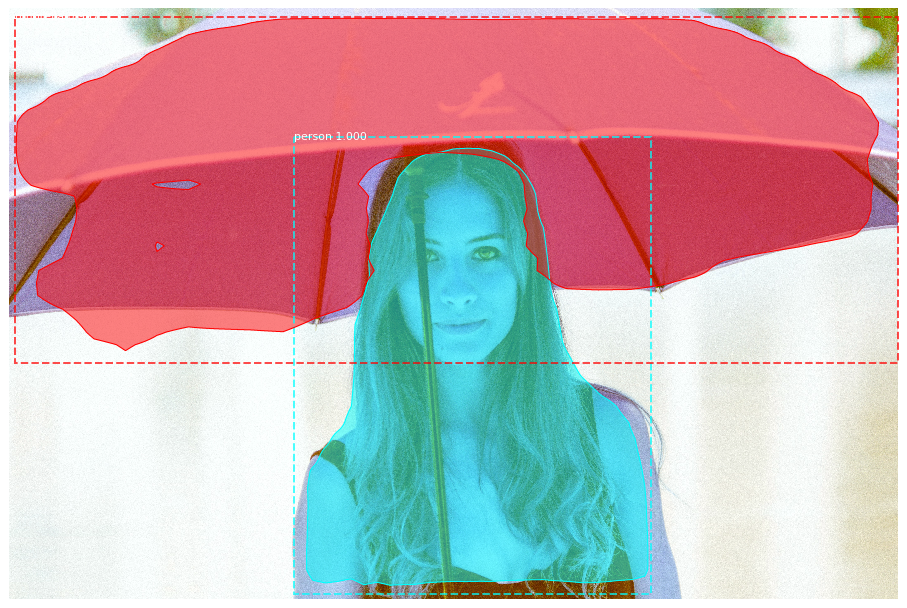

Check file at C:/Users/farha/Desktop/mrcnn_out/abcxyzghed.jpg
(2848, 4288, 3)
(2848, 4288, 3)


True

In [56]:
#kirsty-huth-BsLd5k1QHkQ-unsplash
#used crop and resize features of
#try to keep resolutions almost same
#bigger resolution background is preferred
#https://www.befunky.com/create/crop-photo/
# Input the original image name
original_image='C:/Windows/System32/Mask_RCNN/My_images/pietro-tebaldi-Uew6dQL6DTo-unsplash.jpg'
another_image = 'C:/Windows/System32/Mask_RCNN/bg/rodion-kutsaev-pVoEPpLw818-unsplash.jpg'
image = cv2.imread(original_image)
another_one = cv2.imread(another_image)

#resize each image to smaller image 
a1,b1,c1=image.shape
a2,b2,c2=another_one.shape
a=min(a1,a2)
b=min(b1,b2)

#1900x3500 should work fine
def cropND(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]


image =cropND(image, (a,b))
#a,b,c=image.shape
another_one=cropND(another_one, (a,b))

print(image.shape)
print(another_one.shape)
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]

masked_numpy_array=visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
#made changes to visualise.py

image_name = "abcxyzghed"

directory = "C:/Users/farha/Desktop/mrcnn_out/"
                      
                            
visualize.save_image(image=image, image_name=image_name, boxes=r['rois'], masks=r['masks'], class_ids=r['class_ids'], 
                     class_names=class_names, scores=r['scores'],save_dir=directory,scores_thresh=0.6,mode=0)
#have to resize the image before it is sent to the function
print(image.shape)
print(another_one.shape)



cv2.imwrite('original_image.jpg', image)
cv2.imwrite('another_image.jpg', another_one)
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="multi",area="all",background="another_image",background_image=another_one)

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image15.jpg', frame)
# Wait for keys to exit or save
#cv2.destroyAllWindows()

(1280, 589, 3)
(1280, 589, 3)
(1280, 589, 3)
Processing 1 images
image                    shape: (1280, 589, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


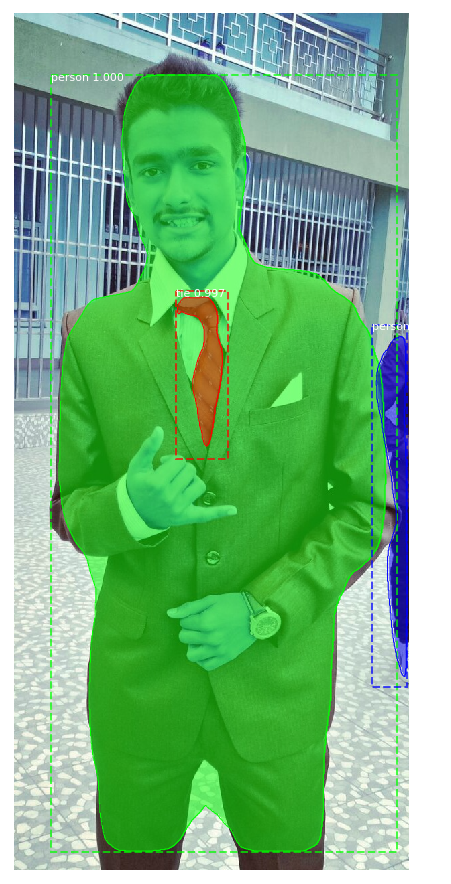

Check file at C:/Users/farha/Desktop/mrcnn_out/abcxyzghed.jpg
(1280, 589, 3)
(1280, 589, 3)


True

In [77]:
#kirsty-huth-BsLd5k1QHkQ-unsplash
#used crop and resize features of
#try to keep resolutions almost same
#bigger resolution background is preferred
#https://www.befunky.com/create/crop-photo/
# Input the original image name
original_image='C:/Windows/System32/Mask_RCNN/My_images/farewell.jpg'
another_image = 'C:/Windows/System32/Mask_RCNN/bg/abcd.jpg'

image = cv2.imread(original_image)
print(image.shape)
another_one = cv2.imread(another_image)

#resize each image to smaller image 
a1,b1,c1=image.shape
#another_one = create_blank(b1, a1, rgb_color=(255, 255, 255))
a2,b2,c2=another_one.shape
a=min(a1,a2)
b=min(b1,b2)

#1900x3500 should work fine
def cropND(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]


image =cropND(image, (a,b))
#a,b,c=image.shape
another_one=cropND(another_one, (a,b))

print(image.shape)
print(another_one.shape)
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]

masked_numpy_array=visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
#made changes to visualise.py

image_name = "abcxyzghed"

directory = "C:/Users/farha/Desktop/mrcnn_out/"
                      
                            
visualize.save_image(image=image, image_name=image_name, boxes=r['rois'], masks=r['masks'], class_ids=r['class_ids'], 
                     class_names=class_names, scores=r['scores'],save_dir=directory,scores_thresh=0.6,mode=0)
#have to resize the image before it is sent to the function
print(image.shape)
print(another_one.shape)



cv2.imwrite('original_image.jpg', image)
cv2.imwrite('another_image.jpg', another_one)
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="single",area="max",background="another_image",background_image=another_one)

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image16.jpg', frame)
# Wait for keys to exit or save
#cv2.destroyAllWindows()
#https://www.jasondavies.com/wordcloud/

(3024, 1999, 3)
(3024, 1999, 3)
Processing 1 images
image                    shape: (3024, 1999, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 3024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


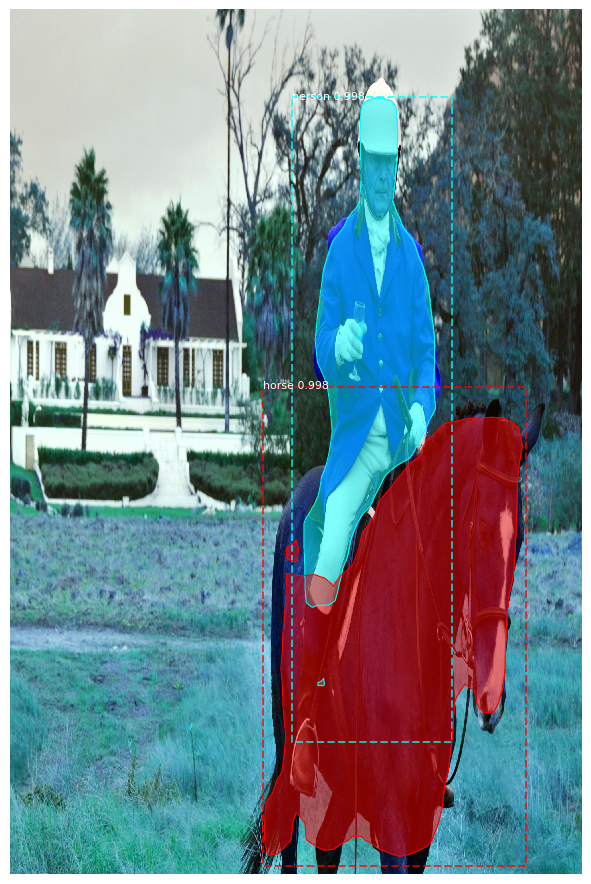

Check file at C:/Users/farha/Desktop/mrcnn_out/abcxyzghed.jpg
(3024, 1999, 3)
(3024, 1999, 3)


True

In [71]:

#bottle_resized = resize(bottle, (140, 54))
#cv2.resize(img, dsize=(54, 140), interpolation=cv2.INTER_CUBIC)

#kirsty-huth-BsLd5k1QHkQ-unsplash

# Input the original image name
original_image='C:/Users/farha/Desktop/kirsty-huth-BsLd5k1QHkQ-unsplash_1.jpg'
another_image = 'C:/Windows/System32/Mask_RCNN/bg/295253.jpg'
image = cv2.imread(original_image)
another_one = cv2.imread(another_image)

#resize each image to smaller image 
a1,b1,c1=image.shape
a2,b2,c2=another_one.shape
a=min(a1,a2)
b=min(b1,b2)



image =cv2.resize(image, dsize=(a, b), interpolation=cv2.INTER_CUBIC)
#a,b,c=image.shape
another_one=cv2.resize(another_one, dsize=(a,b),interpolation=cv2.INTER_CUBIC)

print(image.shape)
print(another_one.shape)
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]

masked_numpy_array=visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
#made changes to visualise.py

image_name = "abcxyzghed"

directory = "C:/Users/farha/Desktop/mrcnn_out/"
                      
                            
visualize.save_image(image=image, image_name=image_name, boxes=r['rois'], masks=r['masks'], class_ids=r['class_ids'], 
                     class_names=class_names, scores=r['scores'],save_dir=directory,scores_thresh=0.6,mode=0)
#have to resize the image before it is sent to the function
print(image.shape)
print(another_one.shape)



cv2.imwrite('original_image.jpg', image)
cv2.imwrite('another_image.jpg', another_one)
frame = display_instances_custom_mod(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],
                                     mode="single",area="max",background="another_image",background_image=another_one)

#cv2.imshow('save_image', frame)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image9.jpg', frame)
# Wait for keys to exit or save
#cv2.destroyAllWindows()

In [48]:
frame=cv2.resize(frame, dsize=(a1,b1),interpolation=cv2.INTER_CUBIC)
cv2.imwrite('C:\\Windows\\System32\\Mask_RCNN\\save_image11.jpg', frame)
#https://www.befunky.com/create/crop-photo/

True

In [27]:
#need to construct an array of everything

def append_to_empty(arr1):
    #arr2=np.array([]) 
    arr2=np.empty([0],dtype=int)
    #np.append(arr2, arr1)
    try :
        res=np.concatenate((arr2,arr1))
    except:
        res=np.vstack((arr2,arr1))
    return res

def append_to_empty_mod(arr):
    lst=arr.tolist()
    empty=[]
    empty.append(lst)
    res=np.array([np.array(xi) for xi in empty])
    return res


#for mask we have to append at last

print(r['rois'][0])
print(type(r['rois'][0]))
append_to_empty_mod(r['rois'][0])


[ 190  819 1870 1904]
<class 'numpy.ndarray'>


array([[ 190,  819, 1870, 1904]])

In [28]:
#print(r)
r['masks'].shape
#r['masks'][:,:,0]
#r['masks'][:,:,3]

(1900, 3500, 1)

In [29]:
#delete from mask each position except position i
def delete_items_except(arr,index):
    s1,s2,s3=arr.shape
    #range(10, 0, -1)
    #print(s3)
    
    for i in reversed(range(s3)):
        #print (i)
        if (i==index):
            #print("Index Encountered")
            continue
        else:
            #delete this row
            #https://thispointer.com/delete-elements-rows-or-columns-from-a-numpy-array-by-index-positions-using-numpy-delete-in-python/
            arr = np.delete(arr, i, axis=2)
            #print("Deleted Dim",i)
    return arr
            
            
            
delete_items_except(r['masks'],1).shape

(1900, 3500, 0)

Object no. 0
[[ 190  819 1870 1904]]
Detected Object Label : person


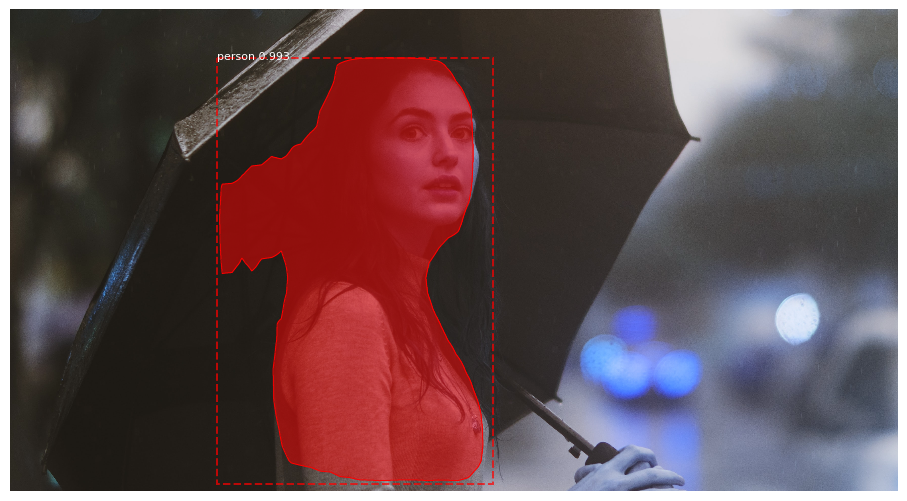

In [30]:
#print(r)
n_instances = r['rois'].shape[0]
for i in range(n_instances):
        if not np.any(r['rois'][i]):
            continue
        print("Object no.",i)
        current_box=append_to_empty_mod(r['rois'][i])
        current_mask= delete_items_except(r['masks'],i)
        current_id=append_to_empty_mod(r['class_ids'][i])
        current_score=append_to_empty_mod(r['scores'][i])
        
        current_label = class_names[r['class_ids'][i]]
        
        print(current_box)
        #print(current_mask.shape)
        #print(current_id.shape)
        
        print("Detected Object Label :",current_label)
        masked_numpy_array=visualize.display_instances(image, current_box, current_mask, current_id, 
                            class_names, current_score)

In [31]:
#to do maybe later
#sort the masks from  left to right wrt first border encountered for each bounding box
#will be a sort by min of x values
min_x=[]

def merge_list_to_dict(test_keys,test_values):
    # using dictionary comprehension 
    # to convert lists to dictionary 
    merged_dict = {test_keys[i]: test_values[i] for i in range(len(test_keys))} 
    return merged_dict

def print_dict(new_dict):
    print ("Dictionary is :  ")  
    print("keys: values") 
    for i in new_dict:
        print(i, " :", new_dict[i]) 


for i in range(len(r['rois'])):
    #print(box)
    y1, x1, y2, x2 = r['rois'][i]
    print(x1)
    #we will try to sort by x values
    min_x.append(min(x1,x2))


print(min_x)    
print(r['rois'])

lst1=min_x
lst2=list(range(len(r['rois'])))
data=merge_list_to_dict(lst1,lst2)
print_dict(data)
print(min_x.sort())
min_x

819
[819]
[[ 190  819 1870 1904]]
Dictionary is :  
keys: values
819  : 0
None


[819]

In [32]:
#https://gist.github.com/navenduagarwal/95269ee19462e07edb2b4704116d0c5d

def create_blank(width, height, rgb_color=(0, 0, 0)):
    """Create new image(numpy array) filled with certain color in RGB"""
    # Create black blank image
    image = np.zeros((height, width, 3), np.uint8)

    # Since OpenCV uses BGR, convert the color first
    color = tuple(reversed(rgb_color))
    # Fill image with color
    image[:] = color

    return image


# Create new blank 300x300 red image
width1, height1 = 300, 300

red = (255, 0, 0)
white=(255, 255, 255)
image = create_blank(width1, height1, rgb_color=white)
cv2.imwrite('whitenew.jpg', image)

True

In [33]:
#https://www.codespeedy.com/convert-rgb-to-hex-color-code-in-python/
#RGB to Hex
#it works!!!
def rgb_to_hex(rgb):
    r,g,b=rgb
    return '#%02x%02x%02x' % (r,g,b)
print(rgb_to_hex((0, 34, 255)))


#Hex to RGB

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i+lv//3], 16) for i in range(0, lv, lv//3))
print(hex_to_rgb("#0022ff"))

#https://www.codespeedy.com/create-random-hex-color-code-in-python/

import random

#has some type of biasing that shows only green-yellow colours
def generate_random_hex():
    random_number = random.randint(0,16777215)
    hex_number = str(hex(random_number))
    hex_number ='#'+ hex_number[2:]
    print('A  Random Hex Color Code is :',hex_number)
    return hex_number
print(generate_random_hex())

#0022ff
(0, 34, 255)
A  Random Hex Color Code is : #770af6
#770af6


In [34]:
width1, height1 = 300, 300

random_hex_code=generate_random_hex()
random_rgb_code=hex_to_rgb(random_hex_code)
image = create_blank(width1, height1, rgb_color=random_rgb_code)
cv2.imwrite('random'+random_hex_code+'.jpg', image)

A  Random Hex Color Code is : #46d3af


True

In [35]:

white_img = np.zeros([100,100,3],dtype=np.uint8)
white_img.fill(255) # or img[:] = 255
cv2.imwrite('C:\Windows\System32\Mask_RCNN\white.jpg', white_img)


black_img = np.zeros([100,100,3],dtype=np.uint8)
#black_img.fill(0) # or img[:] = 255
cv2.imwrite('C:\Windows\System32\Mask_RCNN\black.jpg', black_img)

False

In [36]:
import cv2
import numpy as np
# black blank image
blank_image = np.zeros(shape=[512, 512, 3], dtype=np.uint8)
# print(blank_image.shape)
#cv2.imshow("Black Blank", blank_image)
# white blank image
blank_image2 = 255 * np.ones(shape=[512, 512, 3], dtype=np.uint8)

In [37]:
import colorsys
import cv2
#generates random colors in semi rgb format
"""
copied from visualize.py mask rcnn
Mask R-CNN
Display and Visualization Functions.

Copyright (c) 2017 Matterport, Inc.
Licensed under the MIT License (see LICENSE for details)
Written by Waleed Abdulla
"""

def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors
colors=random_colors(10)
for color in colors:
    r,g,b=color
    r=round(r*255)
    g=round(g*255)
    b=round(b*255)
    image = create_blank(8000, 5000, rgb_color=(r,g,b))
    cv2.imwrite('C:/Windows/System32/Mask_RCNN/Bright_Random/random_bright_rgb'+str(r)+'_'+str(g)+'_'+str(b)+'.jpg', image)



In [38]:
os.getcwd()

'C:\\Windows\\System32\\Mask_RCNN'

In [39]:
sys.path

['C:\\Users\\farha\\Desktop\\ColorSplash',
 'C:\\ProgramData\\Anaconda3\\python37.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\farha\\.ipython',
 'C:\\Windows\\System32\\Mask_RCNN',
 'C:\\Windows',
 'C:\\Windows\\System32']

In [40]:
empty=[]
len(empty)

0